In [1]:
import os

import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

from scipy import stats
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [2]:
data=pd.read_csv('supply_train.csv')

In [3]:
data=data.drop(['Unnamed: 0'], axis=1)

In [4]:
data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [5]:
data['wh_est_year']=data['wh_est_year'].replace(to_replace=np.nan,value=0)

In [6]:
data['approved_wh_govt_certificate']=data['approved_wh_govt_certificate'].replace(to_replace=np.nan,value=0)

In [7]:
data['workers_num']=data['workers_num'].replace(to_replace=np.nan,value=28)

In [8]:
data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [9]:
data.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.874910,1059.077316,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.685148,1003.243662,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,0.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,1998.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [10]:
org_data=data.loc[:,['num_refill_req_l3m','transport_issue_l1y','flood_impacted','Competitor_in_mkt','retail_shop_num','dist_from_hub','workers_num','wh_breakdown_l3m','storage_issue_reported_l3m','product_wg_ton']]

In [11]:
corr=org_data.corr()
corr

,num_refill_req_l3m,transport_issue_l1y,flood_impacted,Competitor_in_mkt,retail_shop_num,dist_from_hub,workers_num,wh_breakdown_l3m,storage_issue_reported_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,-0.015214,0.019149,-0.005090,-0.000909,-0.013827,0.000249,-0.008875,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.009324,-0.010148,0.000400,0.009382,-0.006779,0.014092,-0.152709,-0.183150
flood_impacted,-0.015214,-0.009324,1.000000,0.012223,-0.010186,0.013265,0.148482,0.000643,-0.001571,-0.000507
Competitor_in_mkt,0.019149,-0.010148,0.012223,1.000000,-0.155607,0.014434,-0.013648,0.014849,0.011957,0.010854
retail_shop_num,-0.005090,0.000400,-0.010186,-0.155607,1.000000,-0.000910,-0.009968,0.000558,-0.008094,-0.008332
dist_from_hub,-0.000909,0.009382,0.013265,0.014434,-0.000910,1.000000,-0.013023,0.002410,-0.011496,-0.011380
workers_num,-0.013827,-0.006779,0.148482,-0.013648,-0.009968,-0.013023,1.000000,-0.012389,-0.005700,-0.005446
wh_breakdown_l3m,0.000249,0.014092,0.000643,0.014849,0.000558,0.002410,-0.012389,1.000000,0.379624,0.345474
storage_issue_reported_l3m,-0.008875,-0.152709,-0.001571,0.011957,-0.008094,-0.011496,-0.005700,0.379624,1.000000,0.986716
product_wg_ton,-0.000646,-0.183150,-0.000507,0.010854,-0.008332,-0.011380,-0.005446,0.345474,0.986716,1.000000


<Axes: >

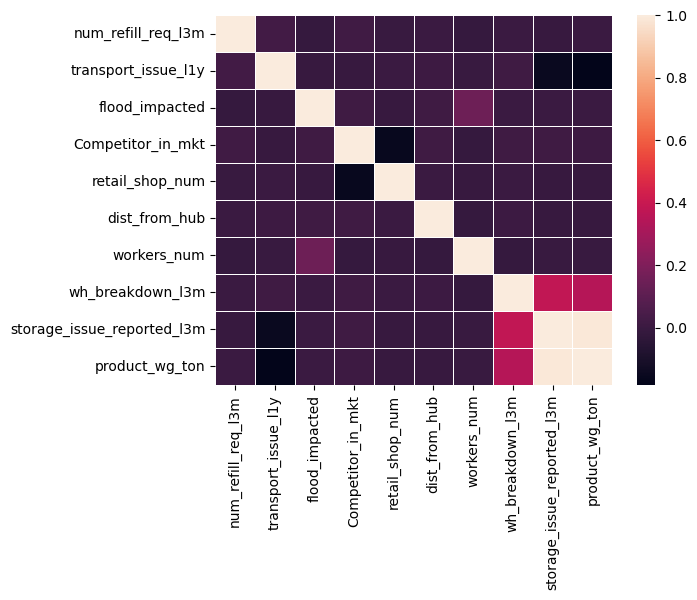

In [12]:
sns.heatmap(corr,linewidths=0.7)

Relationship between wharehouse capacity and product weight tone.

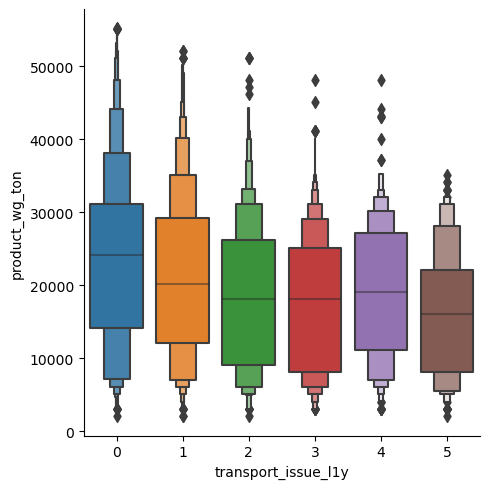

In [13]:
sns.catplot(x='transport_issue_l1y',y='product_wg_ton',kind="boxen",data=org_data)

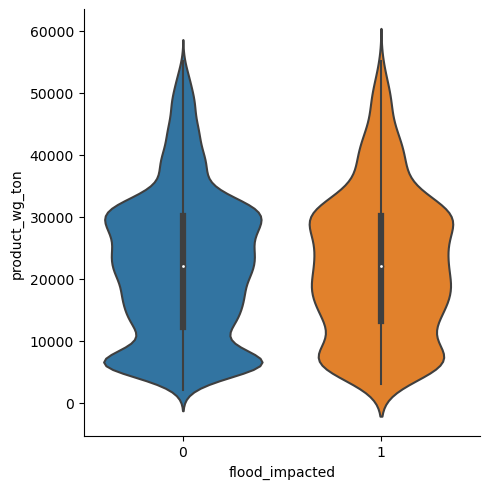

In [14]:
sns.catplot(x='flood_impacted',y='product_wg_ton',kind="violin",
            data=org_data)

C:\Users\monis\AppData\Local\Temp\ipykernel_25288\3561742724.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(org_data['product_wg_ton'], color="orange")


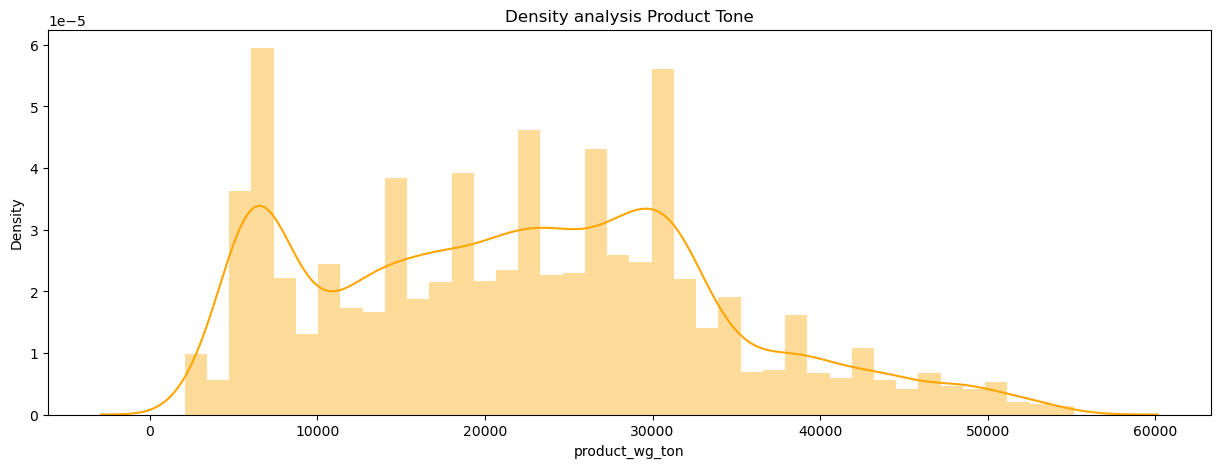

In [15]:
# House Age Distribution 
plt.figure(figsize=(15,5))
sns.distplot(org_data['product_wg_ton'], color="orange")
plt.title("Density analysis Product Tone")
plt.ylabel("Density")
plt.xlabel("product_wg_ton");

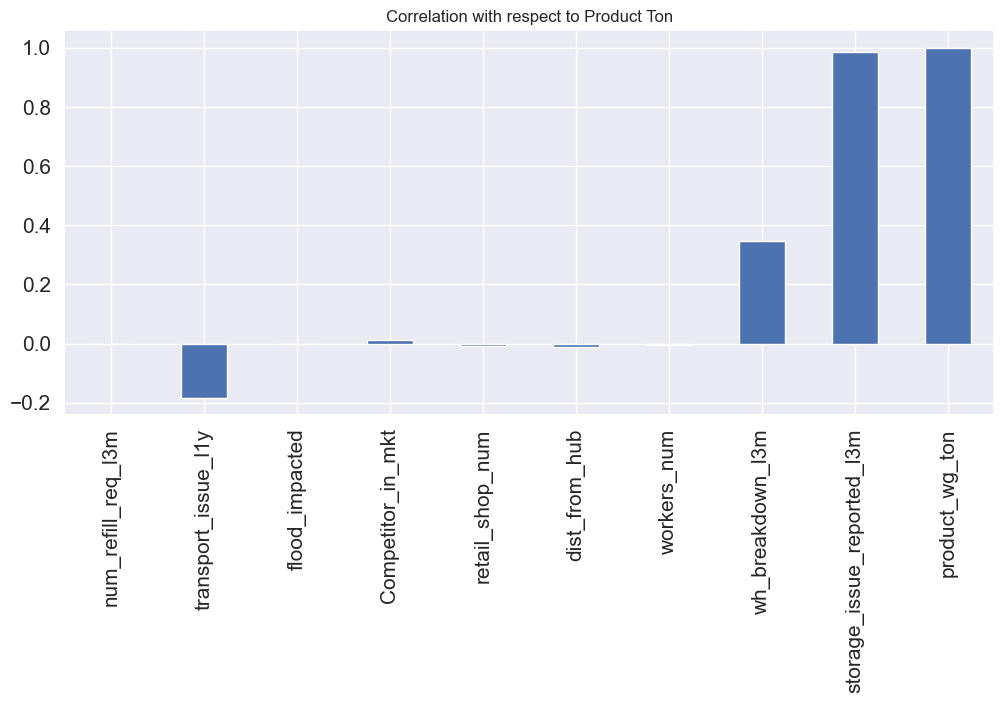

In [20]:
# Features having coorelation to price
sns.set(color_codes=True)
org_data.corrwith(org_data.product_wg_ton).plot.bar( figsize = (12, 5), title = "Correlation with respect to Product Ton", fontsize = 15, rot = 90, grid = True);

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target = org_data["product_wg_ton"]
features = org_data.drop("product_wg_ton", axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [26]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
# Rsquared Score for Linear Regression
r2_score(Y_test, y_pred)

0.9752866534787781

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBRegressor
folds=10
param_grid = {'learning_rate' : [0.005,0.01,0.001], 'n_estimators' : [40,200], 'random_state': [5],
              'max_depth' : [4,9]}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_xgb.fit(X_train, Y_train)

sc_xgb = get_best_score(grid_xgb)
pred_xgb = grid_xgb.predict(X_test)

2190.0161553911003
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=5, ...)


In [32]:
# Rsquared Score for XGBoost Regressor
r2_score(Y_test, pred_xgb)


0.9648648254668957

In [35]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv = folds, verbose = 0, scoring = score_calc)
grid_sgd.fit(X_train_sc, Y_train)

sc_sgd = get_best_score(grid_sgd)
pred_sgd = grid_sgd.predict(X_test_sc)

1818.4084447115822
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


In [36]:
# Rsquared Score for SGD Regressor
r2_score(Y_test, pred_sgd)

0.9752197572390348

In [37]:
#Model Building RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
folds  = 5
param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_rf.fit(X_train, Y_train)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(X_test)

1542.6400824126456
{'min_samples_split': 10, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=10, random_state=5)


In [38]:
# Rsquared Score for RF Regression
r2_score(Y_test, pred_rf)

0.9822562497626

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(Y_test,pred_xgb), mean_absolute_error(Y_test, pred_xgb), np.sqrt(mean_squared_error(Y_test, pred_xgb))


(0.9648648254668957, 1748.2782354067954, 2165.0721806491865)

In [ ]:
# Result Evaluation

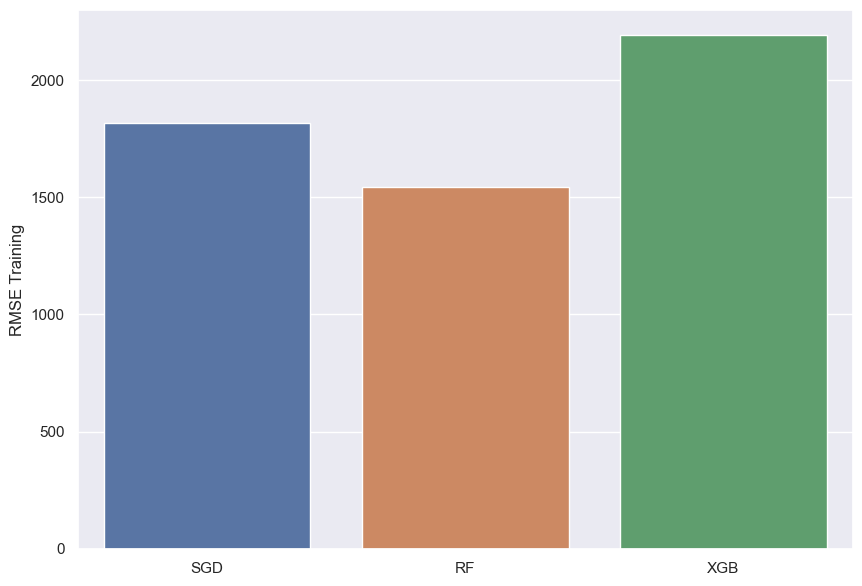

In [40]:
list_scores = [sc_sgd,  sc_rf,  sc_xgb]
list_predictions = [pred_sgd,pred_rf, pred_xgb]
list_regressors = ['SGD','RF','XGB']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE Training')
plt.show()

In [41]:
predictions = {
               'SGD': pred_sgd,  'RF': pred_rf,
                'XGB': pred_xgb}
df_predictions = pd.DataFrame(data=predictions) 

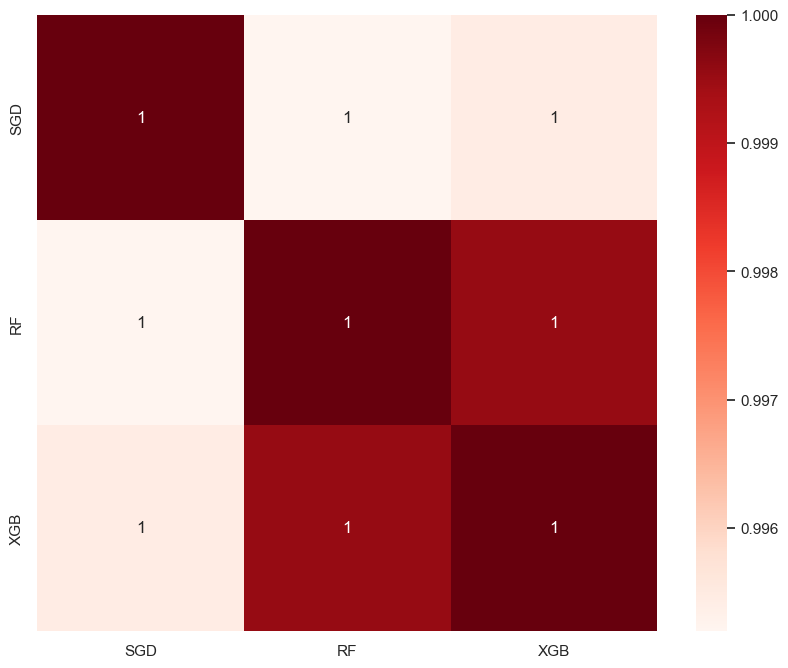

In [42]:
plt.figure(figsize=(10,8))
cor_pred = df_predictions.corr()
sns.heatmap(cor_pred, annot=True, cmap=plt.cm.Reds)
plt.show()